### We have a meassured brightness in filters Ks, H and J as a function of radius from the center of a Galaxy.  
- We going to plot log(th) vs r"
- We going to Add an exponential  of the form  I = Io exp(-r/ro) + B,  that fits the brightness well at large radii with Io, ro and B constants.

In [1]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# read the dataset from google drive
data = pd.read_csv('/content/gdrive/MyDrive/Python/jhk.txt', delim_whitespace=True )
# Filters out rows from the DataFrame where the value of 'th' is 'INDEF'
data = data[data['th'] != 'INDEF']
# desplay the first five entries in data
data.head()

In [11]:
# convert the dataset from object into float
data['th'] = data['th'].astype(float)
# Creates a new column 'log_th' by taking the natural logarithm of the 'th' column
data['log_th'] = np.log(data['th'])
data.head()

,(row),r,"r""",tk,th,tj,log_th
0,1,0.30,0.195,4059.0,3251.0,604.,8.086718
1,2,0.33,0.215,4055.0,3248.0,604.,8.085795
2,3,0.36,0.236,4051.0,3244.0,604.,8.084562
3,4,0.40,0.260,4046.0,3240.0,603.,8.083329
4,5,0.44,0.286,4040.0,3235.0,602.,8.081784


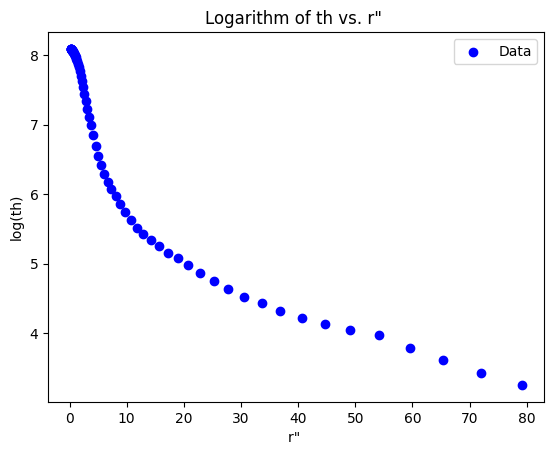

In [12]:
# Plotting the results
plt.scatter(data['r"'], data['log_th'], label='Data', marker='o', color='blue')
plt.xlabel('r" ')
plt.ylabel('log(th)')
plt.legend()
plt.title('Logarithm of th vs. r" ')
plt.show()

In [13]:
# Defines a tuple representing a range of radii
radii_range = (10, 100)
# Selects rows from the DataFrame where the 'r"' values are within the defined range
optim_large_radii = data[(data['r"'] >= radii_range[0]) & (data['r"'] <= radii_range[1])]


In [14]:
# Defines a function exp_func which represents an exponential model
def exp_func(r, Io, ro, B):
    I = Io * np.exp(-r / ro) + B
    return I

In [15]:
# Gets the maximum value of 'log_th' as an initial guess for Ig
Ig = max(data['log_th'])
# Gets the minimum value of 'log_th' as an initial guess for Bg
Bg = min(data['log_th'])
# Sets an initial guess value
rg = 5


In [16]:
# Uses the curve_fit function to fit the exp_func to the 'r"' and 'log_th' data from optim_large_radii.
# parms contains the best fit parameters, and cov is the covariance of parms
parms, cov = curve_fit(exp_func, optim_large_radii['r"'], optim_large_radii['log_th'])
# Extracts the fitted parameters from parms
Io_fit, ro_fit, B_fit = parms
# Creates 1000 evenly spaced values between the minimum and maximum of 'r"'
r_fit = np.linspace(min(data['r"']), max(data['r"']), 1000)
# Uses the fitted model to predict 'log_th' values for r_fit.
log_th_fit = exp_func(r_fit, Io_fit, ro_fit, B_fit)
print(parms)

[ 3.5844454  47.96231457  2.67810341]


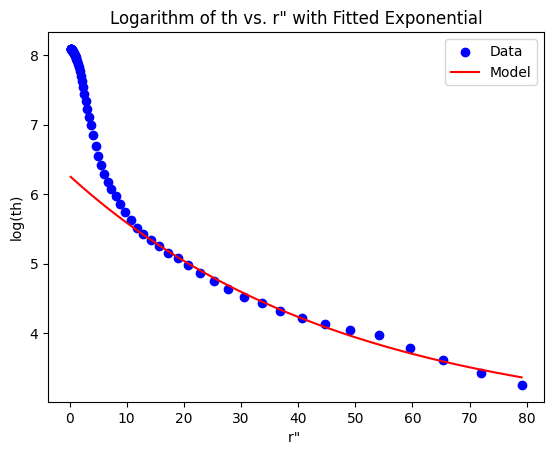

In [17]:
# Plotting the results
plt.scatter(data['r"'], data['log_th'], label='Data', marker='o', color='blue')
plt.plot(r_fit, log_th_fit, label='Model', color='red')
plt.xlabel('r" ')
plt.ylabel('log(th)')
plt.legend()
plt.title('Logarithm of th vs. r" with Fitted Exponential')
plt.show()
